# QF625 Project

## Description

#### **Team No:** 11
#### **Authors:** Yannis Yuan [*01425613*], Victor Yap [*yourID*], Zhi Yang [*yourID*], You Yuquan [*yourID*] 
#### **Background of Data:** 

COVID-19 has infected more than 10,000 people in South Korea. KCDC (Korea Centers for Disease Control & Prevention) announces the information of COVID-19 quickly and transparently. A structured dataset has been created based on the report materials of KCDC and local governments.

#### **Objectives:**

- Describe and visualise the distributions of infection cases with respect to time and geographical location.
- Identify the factors that affect the reported cases of infection and create a story of causal relationships in the spread of COVID-19 in Seoul Province.
- Predict the future trend of COVID-19 infections in multiple ways. 

## Setup

First, we need to set up Google colab to download Kaggle datasets. Before installing `kaggle` module, go to your Kaggle account first, create a new API and upload to the dedicated folder.

In [210]:
# Install kaggle module
!pip install -q kaggle

In [211]:
# Mount the drive to colab notebook
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [212]:
# Set the working directory for Kaggle data
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/My Drive/QF625 Project" # This is the target data directory

In [213]:
# Change the working directory
%cd /content/gdrive/My Drive/QF625 Project/

/content/gdrive/My Drive/QF625 Project


In [214]:
# Download the Kaggle dataset
!kaggle datasets download -d kimjihoo/coronavirusdataset # Copy API command from the kaggle dataset page

 71% 5.00M/7.00M [00:00<00:00, 49.0MB/s]
100% 7.00M/7.00M [00:00<00:00, 44.4MB/s]


In [215]:
# Check the content in the directory 
!ls

Case.csv		QF625_Project.ipynb  Time.csv
coronavirusdataset.zip	Region.csv	     TimeGender.csv
kaggle.json		SearchTrend.csv      TimeProvince.csv
PatientInfo.csv		SeoulFloating.csv    Weather.csv
Policy.csv		TimeAge.csv


In [216]:
# Unzip the data and remove the zip file
!unzip \*.zip && rm *.zip

Archive:  coronavirusdataset.zip
replace Case.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


After we download and unzip datasets from Kaggle, we should import some common libraries for future uses.

In [217]:
# Import common libraries
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [16, 9]
plt.rcParams["figure.dpi"] = 300
pd.set_option("max_columns", 150)
pd.set_option("max_colwidth", 40)
pd.options.display.float_format = "{:,.2f}".format
%matplotlib inline

## Problems and Relevant Datasets

List down the problems, people in charge, and datasets involved

| Problem | Person in Charge | Relevant Datasets |
| --- | --- | --- |
| Where are the reported cases located? Are they in group or individual reports? (Easy) | Zhi Yang | Case.csv |
| Does infection have something to do with gender, age, or geographical location? (Easy) | Zhi Yang | PatientInfo.csv |
| Does weather have to do with reported cases? (Intermediate) | You Yuquan | Time.csv; Weather.csv |
| Have the government policies been effective? (Intermediate) | Victor Yap | Time.csv; Policy.csv |
| What has been and will be the trend of reported cases? (Challenging) | Yannis Yuan | Time.csv |

## Geographical and Demographical Distributions

We first want to work on the Case.csv data which reflects the instantaneous Covid infections in Seoul.

In [218]:
# Load the main datasets that will mainly be worked on
cases = pd.read_csv("./Case.csv")
patients = pd.read_csv("./PatientInfo.csv")
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


There are eight columns of the dataset. Note that these datasets are linked in a relational matter on the primary key case_id. 

## Temporal Distribution and Prediction

### Visualisation and Description

In [219]:
times = pd.read_csv("./Time.csv")
policies = pd.read_csv("./Policy.csv")
weathers = pd.read_csv("./Weather.csv")
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


In [220]:
# Load the head of times data
times.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [221]:
# Add the datetime index
times["date"] = pd.to_datetime(times.date, format="%Y-%m-%d")
times.set_index("date", inplace=True)
times.head()

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0


In [222]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

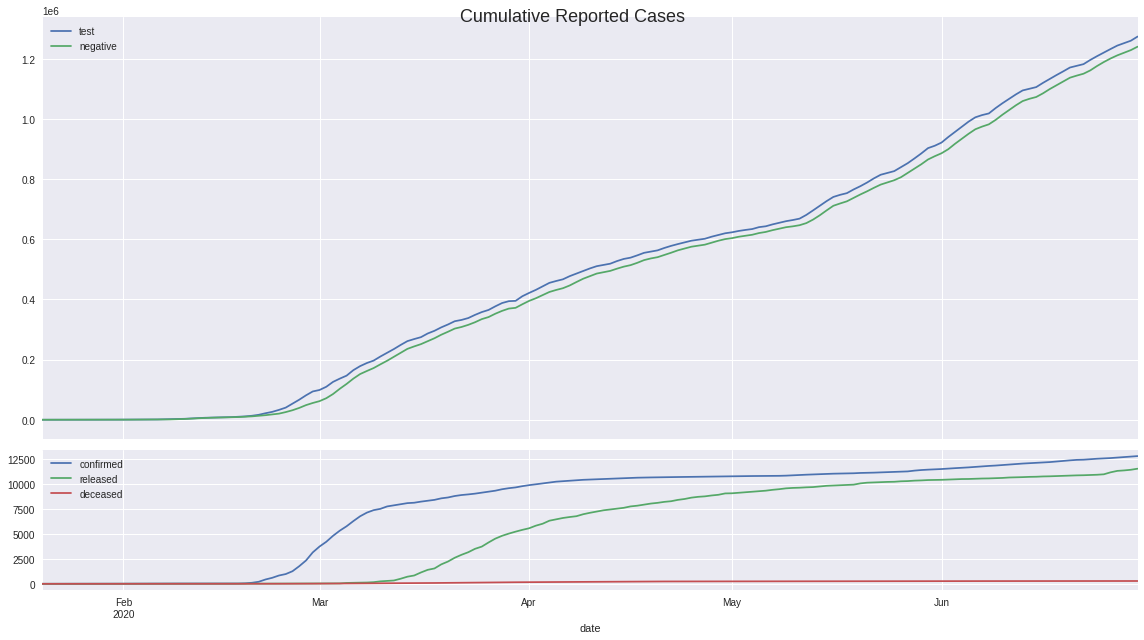

In [223]:
# Plot the graphs
from matplotlib import gridspec
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
fig.suptitle("Cumulative Reported Cases", size=18)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)
times[["test", "negative"]].plot(ax=ax1, figsize=(16, 9))
times[["confirmed", "released", "deceased"]].plot(ax=ax2, figsize=(16, 9))
plt.tight_layout()
plt.show()

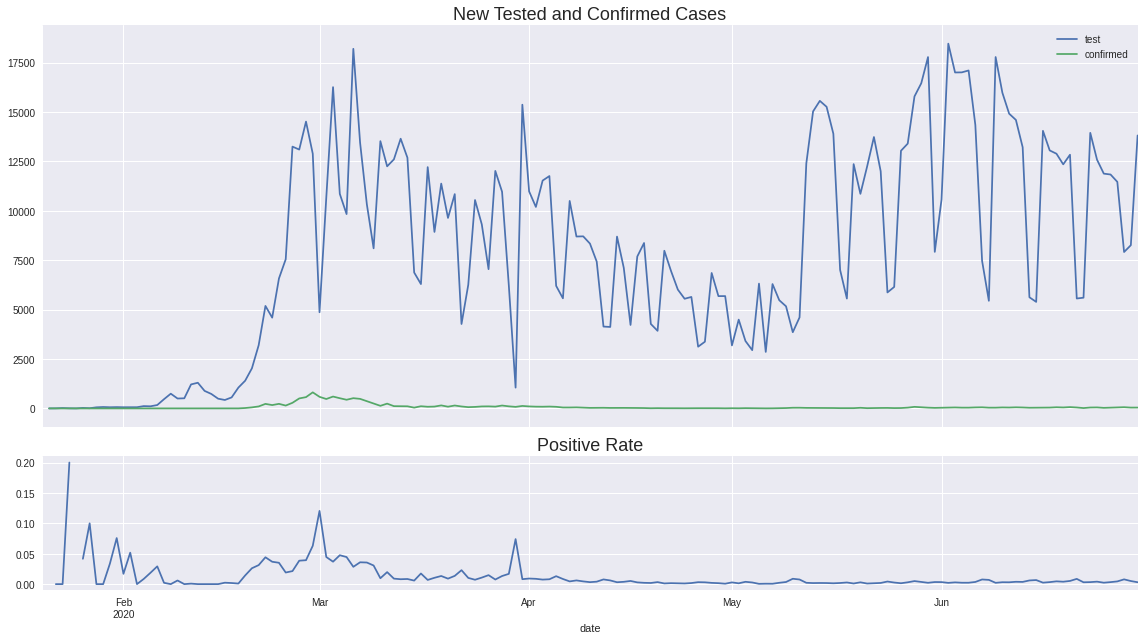

In [224]:
# Create additional variables and plot the positive rate
data = times[["test", "confirmed"]].diff(1)
data["positive_rate"] = data["confirmed"] / data["test"]
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
plt.title("Cumulative Reported Cases", size=18)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)
data[["test", "confirmed"]].plot(ax=ax1)
data["positive_rate"].plot(ax=ax2)
ax1.set_title("New Tested and Confirmed Cases", size=18)
ax2.set_title("Positive Rate", size=18)
plt.tight_layout()
plt.show()

In [225]:
# Check the distribution of confirmed cases and positive rates
data["confirmed"].value_counts()

0.00     13
1.00     10
27.00     6
39.00     5
13.00     4
         ..
30.00     1
11.00     1
14.00     1
26.00     1
94.00     1
Name: confirmed, Length: 94, dtype: int64

Text(0.5, 1.0, 'Distribution of Confirmed Cases')

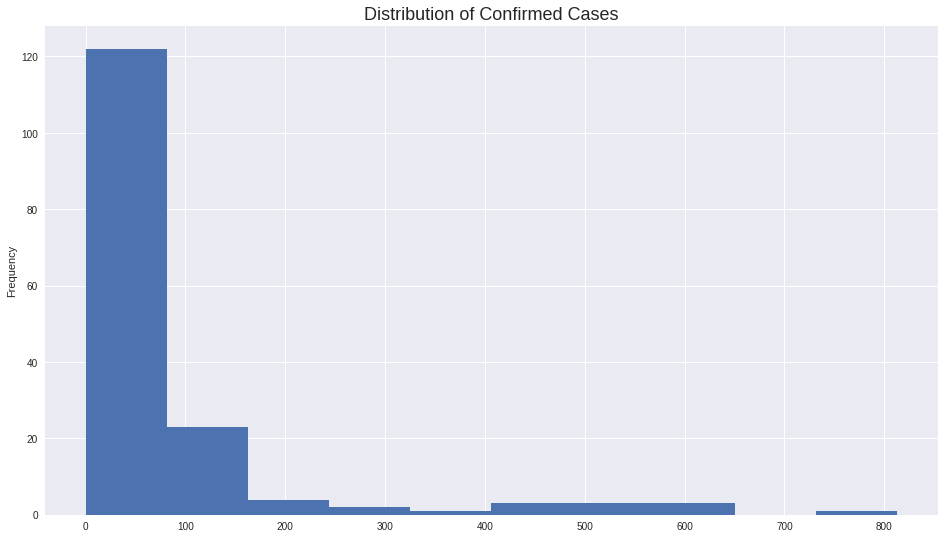

In [226]:
data["confirmed"].plot(kind="hist", figsize=(16, 9))
plt.title("Distribution of Confirmed Cases", size=18)

Text(0.5, 1.0, 'Distribution of Root Confirmed Cases')

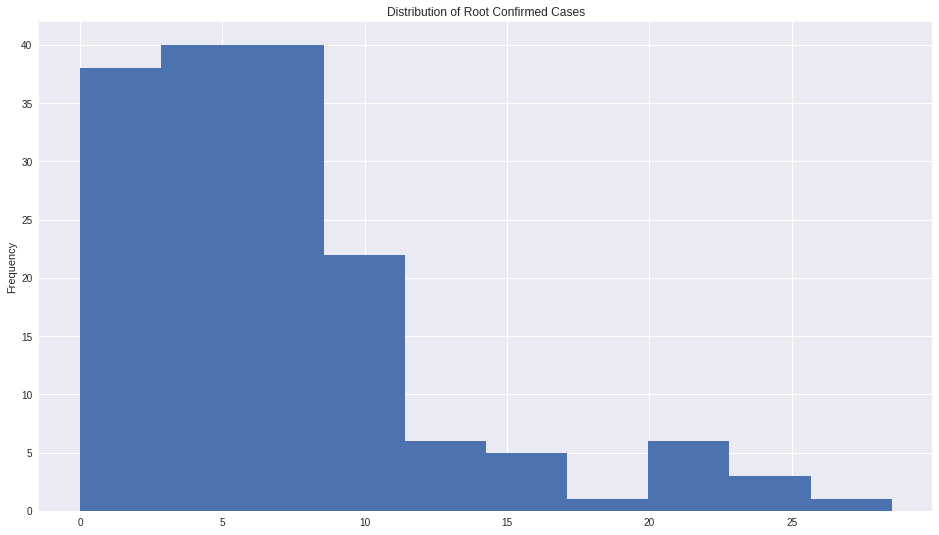

In [227]:
data["confirmed"].apply(lambda x: x**0.5).plot(kind="hist", figsize=(16, 9))
plt.title("Distribution of Root Confirmed Cases")

Text(0.5, 1.0, 'Distribution of Log Confirmed Cases')

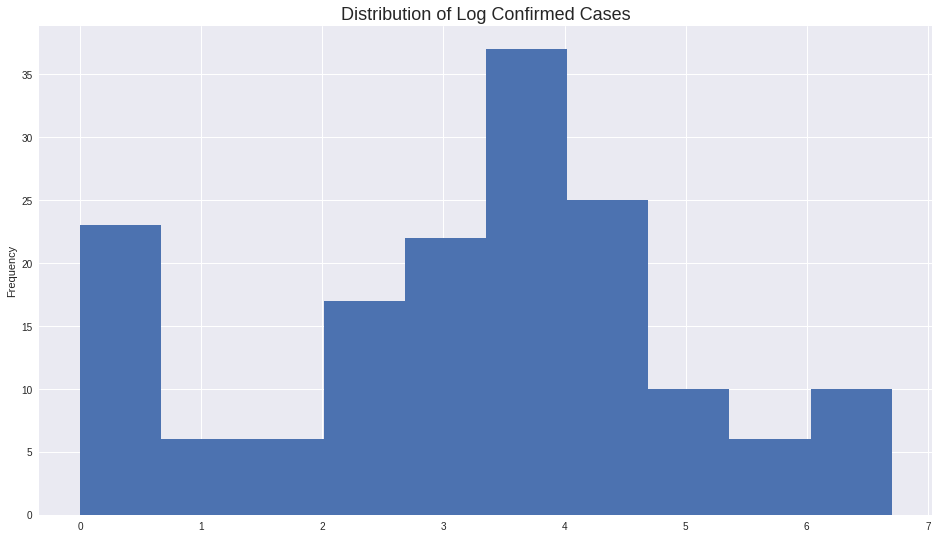

In [228]:
data["confirmed"].apply(lambda x: np.log(x) if x!=0 else 0).plot(kind="hist", figsize=(16, 9))
plt.title("Distribution of Log Confirmed Cases", size=18)

In [229]:
# Overall positive rate
times.iloc[-1]["confirmed"] / times.iloc[-1]["test"]

0.010048941485327761

Text(0.5, 1.0, 'Distribution of Positive Rate')

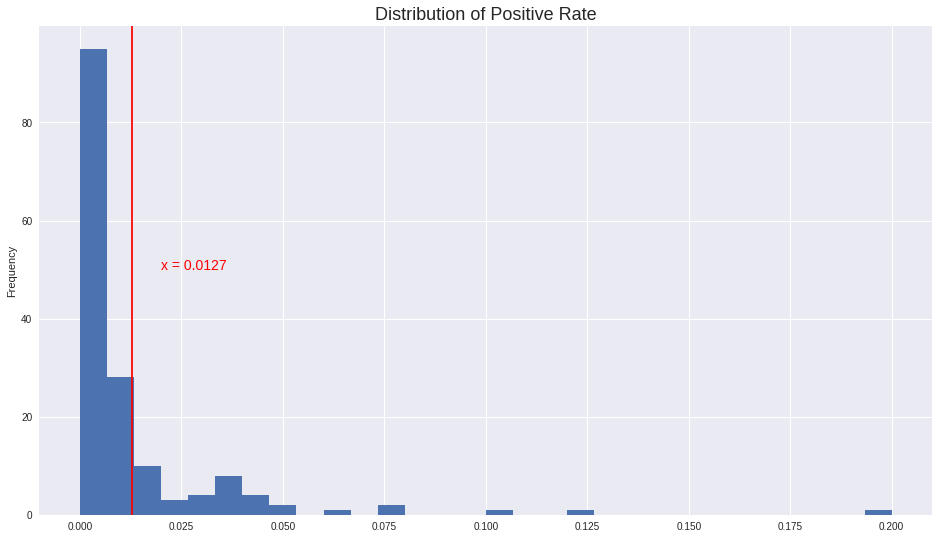

In [230]:
data["positive_rate"].plot(kind="hist", bins=30, figsize=(16, 9))
plt.axvline(x=data["positive_rate"].mean(), color="red")
plt.annotate("x = {:.4f}".format(data["positive_rate"].mean()), xy=(0.02, 50), size=14, color="red")
plt.title("Distribution of Positive Rate", size=18)

In [231]:
# Check how many zeros there are for positive rate
(data["positive_rate"] == 0.0).sum()  # Even exclude these cases, there are still many small positive values

11

Text(0.5, 1.0, 'Line Graph of Positive Rate')

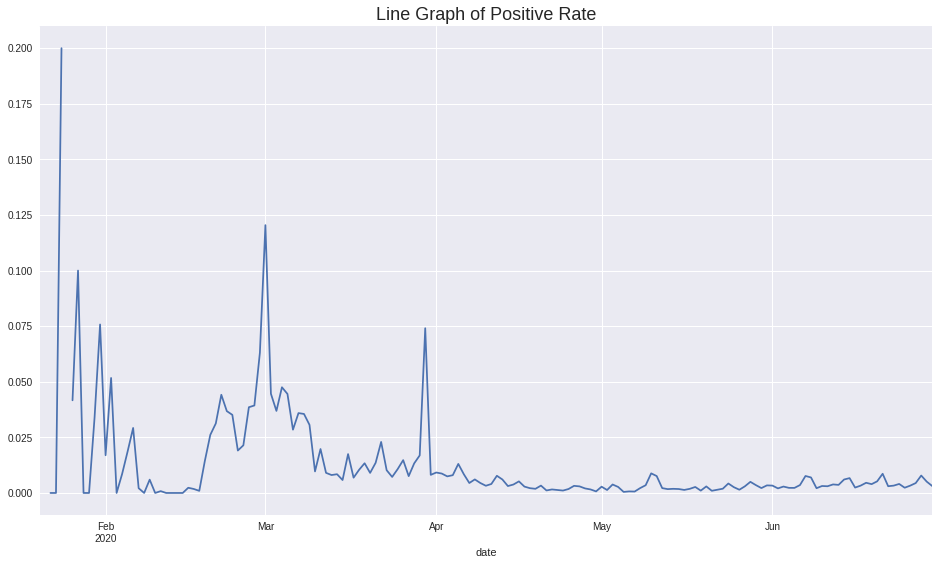

In [232]:
data["positive_rate"].plot(kind="line", figsize=(16, 9))
plt.title("Line Graph of Positive Rate", size=18)

As there are too few confirmed cases every day, we will use 5-day and 10-day SMA to show the pattern of positive rate. 

Text(0.5, 1.0, '5D and 10D Average Positive Rate')

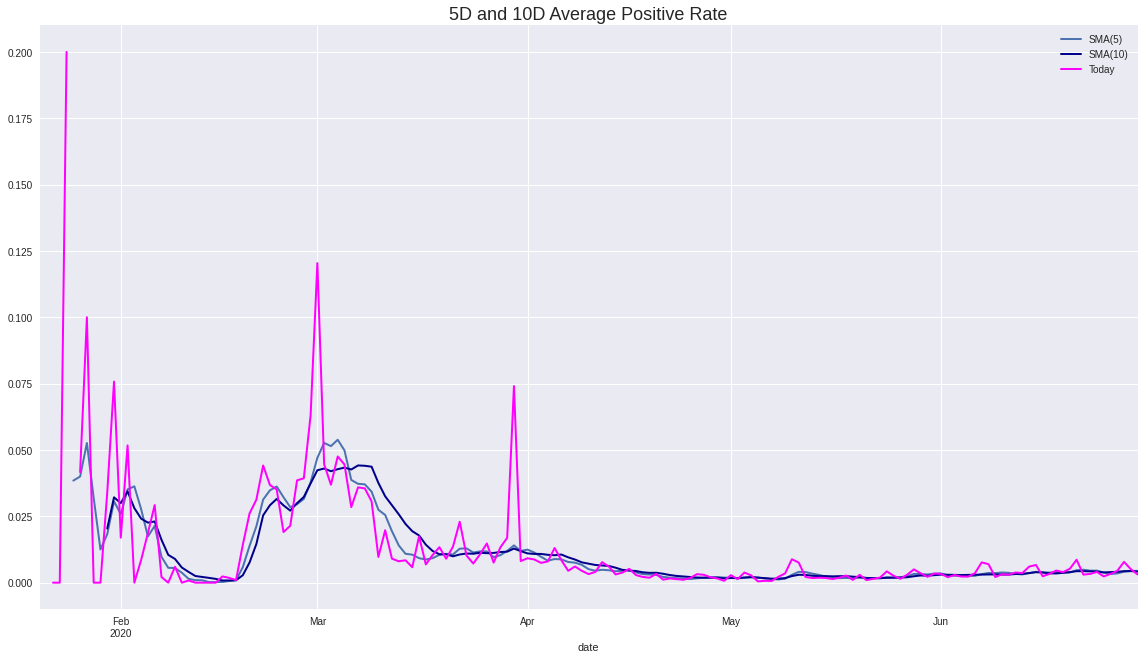

In [233]:
# Get the smooth positive rate
fig, ax = plt.subplots(1, 1)
(data["confirmed"].rolling(5).mean() / data["test"].rolling(5).mean()).plot(ax=ax, kind="line", linewidth=2, label="SMA(5)", figsize=(16, 9))
(data["confirmed"].rolling(10).mean() / data["test"].rolling(10).mean()).plot(ax=ax, kind="line", color="darkblue", linewidth=2, label="SMA(10)", figsize=(16, 9))
data["positive_rate"].plot(ax=ax, kind="line", color="magenta", linewidth=2, label="Today", figsize=(16, 9))
plt.legend()
plt.tight_layout()
plt.title("5D and 10D Average Positive Rate", size=18)

Text(0.5, 1.0, 'MA of Positive Rate')

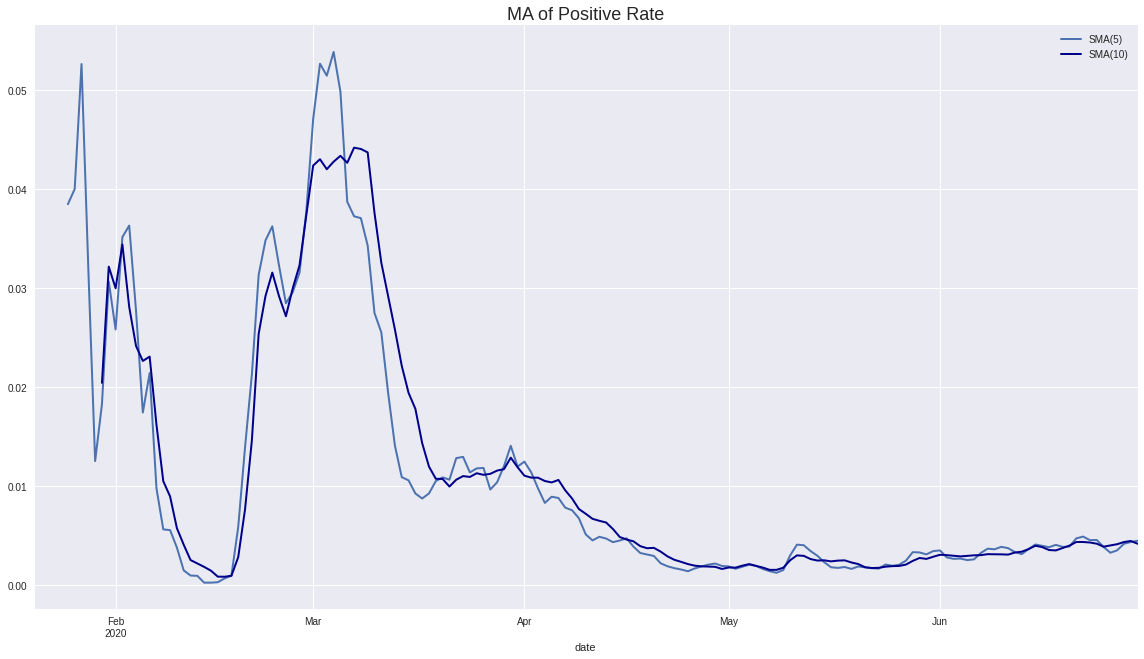

In [234]:
# Get the smooth positive rate
fig, ax = plt.subplots(1, 1)
(data["confirmed"].rolling(5).mean() / data["test"].rolling(5).mean()).plot(ax=ax, kind="line", linewidth=2, label="SMA(5)", figsize=(16, 9))
(data["confirmed"].rolling(10).mean() / data["test"].rolling(10).mean()).plot(ax=ax, kind="line", color="darkblue", linewidth=2, label="SMA(10)", figsize=(16, 9))
plt.legend()
plt.tight_layout()
plt.title("MA of Positive Rate", size=18)

This is much more interesting. If we exclude the confirmed cases before May, the trend can be analysed more easily.

Text(0.5, 1.0, 'Positive Rate since May')

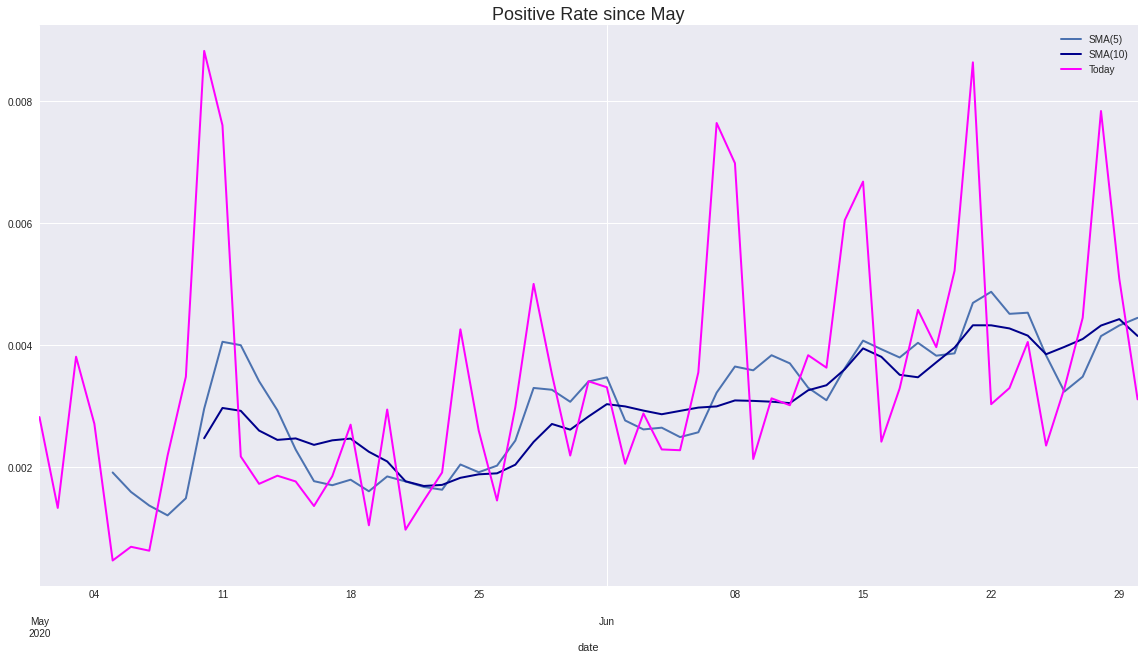

In [235]:
# Get the positive rate since May
fig, ax = plt.subplots(1, 1)
(data["2020-05":]["confirmed"].rolling(5).mean() / data["2020-05":]["test"].rolling(5).mean()).plot(ax=ax, kind="line", linewidth=2, label="SMA(5)", figsize=(16, 9))
(data["2020-05":]["confirmed"].rolling(10).mean() / data["2020-05":]["test"].rolling(10).mean()).plot(ax=ax, kind="line", color="darkblue", linewidth=2, label="SMA(10)", figsize=(16, 9))
data["2020-05":]["positive_rate"].plot(ax=ax, kind="line", color="magenta", linewidth=2, label="Today", figsize=(16, 9))
plt.legend()
plt.tight_layout()
plt.title("Positive Rate since May", size=18)

### Stationarity Testing

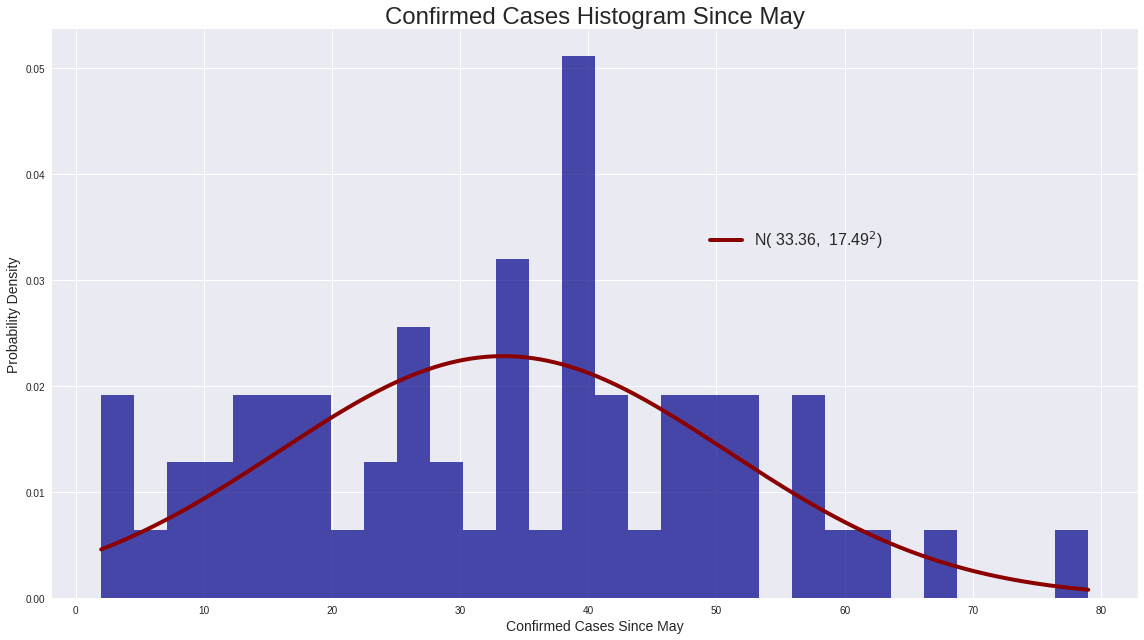

In [236]:
# Plot a histogram of the selected data again
import scipy.stats as scs
subdata = data["2020-05":]
mu = subdata["confirmed"].mean()
sigma = subdata["confirmed"].std()
r_range = np.linspace(subdata["confirmed"].min(), subdata["confirmed"].max(), 10000)
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)
fig = plt.figure(figsize=(16, 9))
plt.hist(subdata["confirmed"], bins=30, color="darkblue", alpha=0.7, density=True)
plt.plot(r_range, norm_pdf, color="darkred", label=f"N({mu: .2f}, {sigma: .2f}$^2$)", lw=4)
plt.xlabel("Confirmed Cases Since May", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.title("Confirmed Cases Histogram Since May", fontsize=24)
plt.legend(loc=(0.6, 0.6), fontsize=16)
plt.tight_layout()
plt.show()

In [237]:
# Get the 3rd and 4th Moment
print("Skewness: {:.2f}".format(scs.skew(subdata["confirmed"])))
print("Extra kurtosis: {:.2f}".format(scs.kurtosis(subdata["confirmed"])))

Skewness: 0.14
Extra kurtosis: -0.53


The daily confirmed cases in the selected period is not significantly skewed. The distribution is platykurtic. Overall, it suffices to say that normal approximation is a fair approximation of the data and no additional scaling steps (taking log, etc.) are needed at this point.

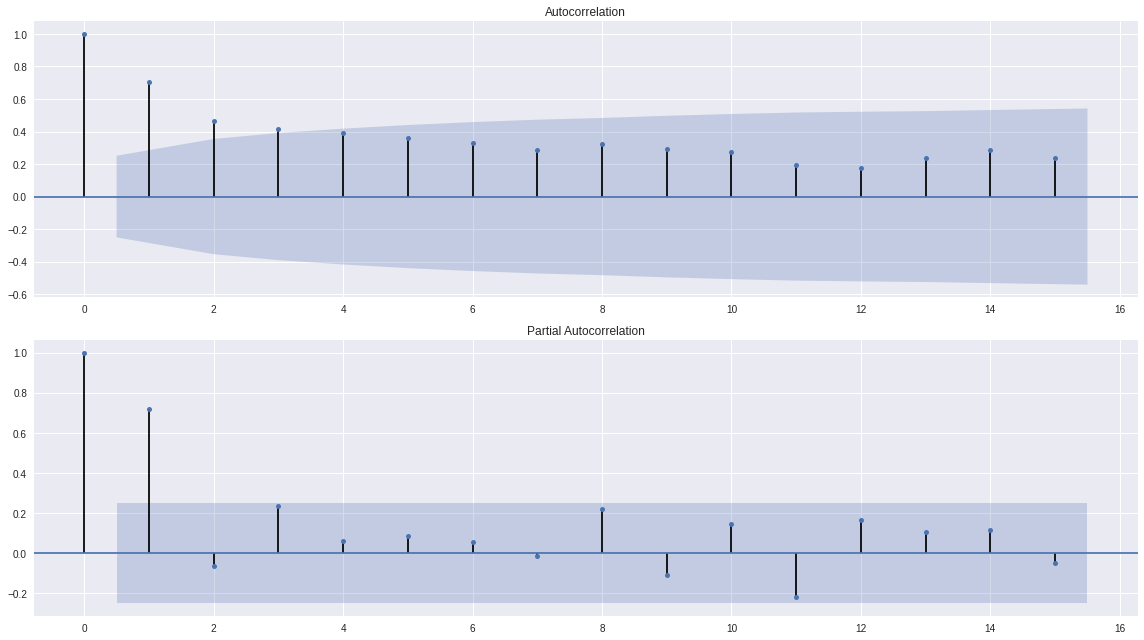

In [238]:
# Autocorrelation Functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
fig, ax = plt.subplots(2, 1, figsize=(16, 9))
plot_acf(subdata["confirmed"], ax=ax[0], lags=15, alpha=0.05)
plot_pacf(subdata["confirmed"], ax=ax[1], lags=15, alpha=0.05)
plt.tight_layout()
plt.show()

The autocorrelation gradually descreases with time lag and it becomes insignificant beyond lag-4. The PACF indicates that a first-order autoregressive model `AR(1)` may be plausible to explain correlations as such. 

In [239]:
def adf_test(ts):
    indices = ["Augmented Dickey-Fuller statistic", "p-value", "# of lags used", "# of observations used"]
    adf_val = adfuller(ts, autolag="AIC")
    critical_val = pd.Series(adf_val[:4], index=indices)
    for pct, val in adf_val[4].items():
        critical_val[f"Critical Value ({pct})"] = val
    return critical_val

def kpss_test(ts, h0_type="c"):
    indices = ["Kwiatkowski-Phillips-chmidt-Shin statistic", "p-value", "# of lags"]
    kpss_val = kpss(ts, regression=h0_type)
    critical_val = pd.Series(kpss_val[:3], index=indices)
    for pct, val in kpss_val[3].items():
        critical_val[f"Critical Value ({pct})"] = val
    return critical_val

print(adf_test(subdata["confirmed"]))
print(kpss_test(subdata["confirmed"]))

Augmented Dickey-Fuller statistic   -3.24
p-value                              0.02
# of lags used                       0.00
# of observations used              60.00
Critical Value (1%)                 -3.54
Critical Value (5%)                 -2.91
Critical Value (10%)                -2.59
dtype: float64
Kwiatkowski-Phillips-chmidt-Shin statistic    0.56
p-value                                       0.03
# of lags                                    11.00
Critical Value (10%)                          0.35
Critical Value (5%)                           0.46
Critical Value (2.5%)                         0.57
Critical Value (1%)                           0.74
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1661: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



The ADF and KPSS tests both imply that the selected data is about stationary at 5% significance level. 

### Seasonal Decomposition

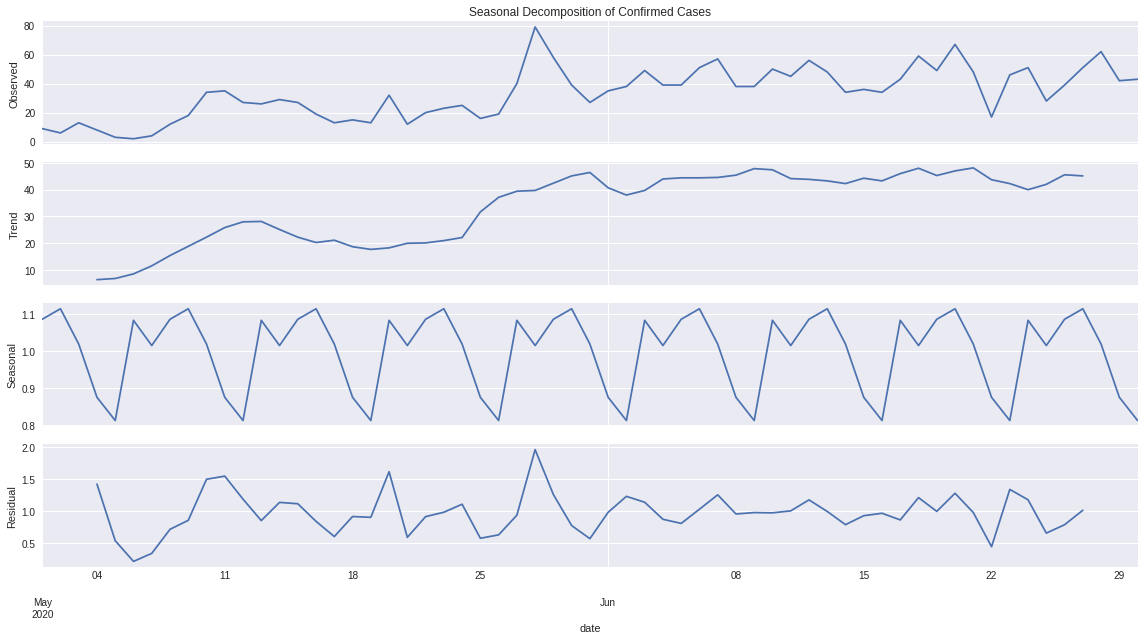

In [240]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(subdata["confirmed"], model="multiplicative")
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(16, 9))
result.observed.plot(ax=ax[0])
ax[0].set(title="Seasonal Decomposition of Confirmed Cases", ylabel="Observed", )
result.trend.plot(ax=ax[1])
ax[1].set(ylabel="Trend")
result.seasonal.plot(ax=ax[2])
ax[2].set(ylabel="Seasonal")
result.resid.plot(ax=ax[3])
ax[3].set(ylabel="Residual")
plt.tight_layout()
plt.show()

The seasonal characteristics are not significant compared to trend. 

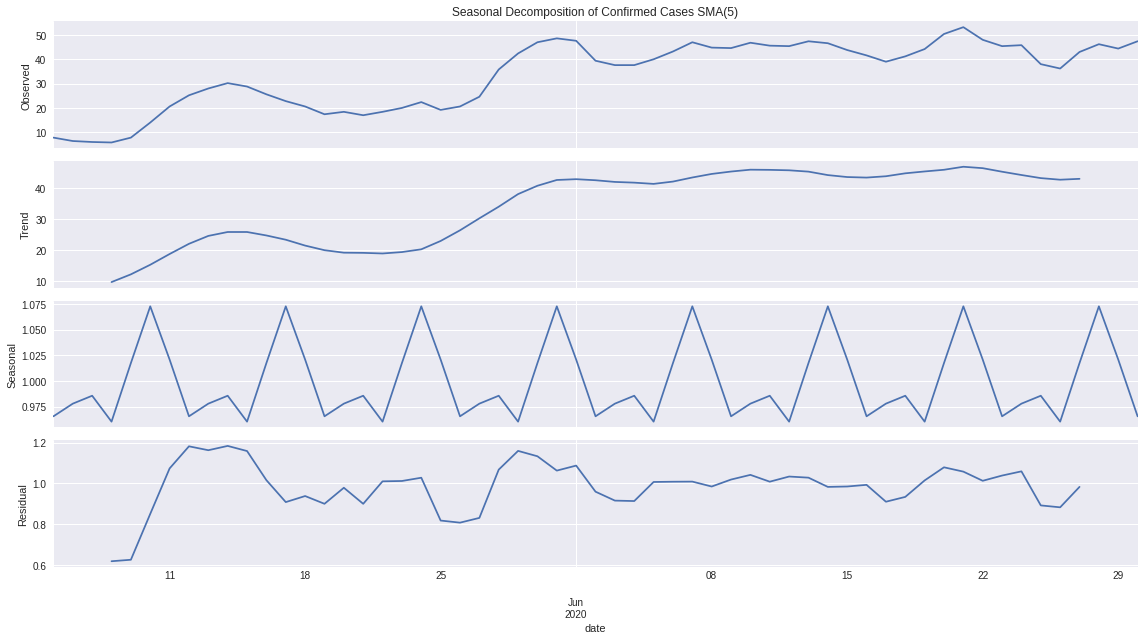

In [241]:
result = seasonal_decompose(subdata["confirmed"].rolling(5).mean().dropna(), model="multiplicative")
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(16, 9))
result.observed.plot(ax=ax[0])
ax[0].set(title="Seasonal Decomposition of Confirmed Cases SMA(5)", ylabel="Observed", )
result.trend.plot(ax=ax[1])
ax[1].set(ylabel="Trend")
result.seasonal.plot(ax=ax[2])
ax[2].set(ylabel="Seasonal")
result.resid.plot(ax=ax[3])
ax[3].set(ylabel="Residual")
plt.tight_layout()
plt.show()

### ARIMA Modelling

In [242]:
train = subdata["confirmed"][:45]
test = subdata["confirmed"][45:]

In [243]:
!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(subdata["confirmed"].dropna(), stepwise=True, error_action="ignore", support_warnings=True, n_jobs=-1)
model.summary()

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_validation.py:75: UserWarning:

stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -239.063
Date:                Fri, 25 Sep 2020   AIC                            480.126
Time:                        08:05:31   BIC                            482.220
Sample:                             0   HQIC                           480.945
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       169.1670     27.861      6.072      0.000     114.561     223.773
===================================================================================
Ljung-Box (Q):                       40.45   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.45   Prob(JB):                         0.74
Heteroskedasticity (H):               3.30   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

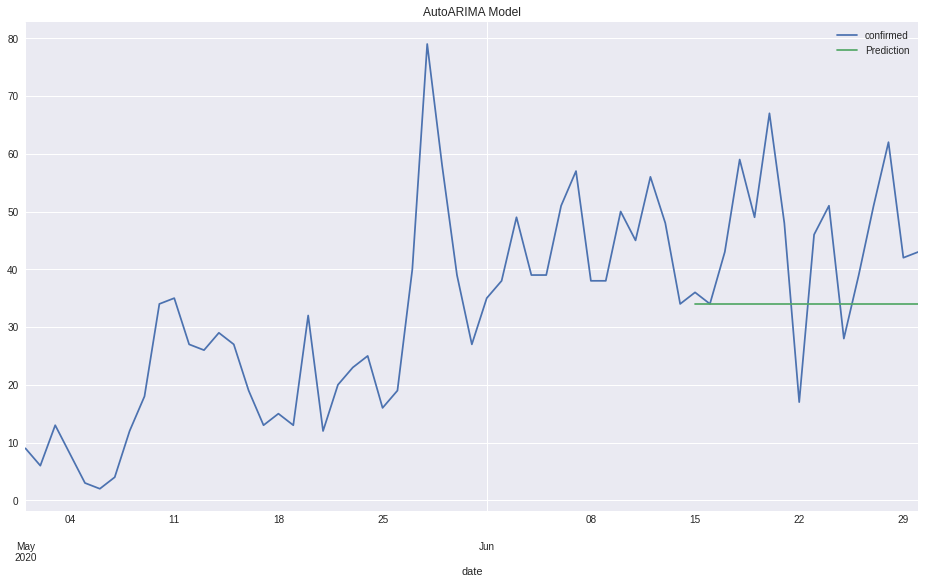

In [244]:
model.fit(train)
pred = model.predict(n_periods=16)
forecast = pd.DataFrame(pred, index=test.index, columns=["Prediction"])
pd.concat([subdata["confirmed"], forecast], axis=1).plot(figsize=(16, 9), title="AutoARIMA Model")

 The automatic ARIMA model is not working due to the prevailing noise. Let's do a smoothing first before fitting into an ARIMA model that does not involve seasonality modelling.

In [245]:
from statsmodels.tsa.arima_model import ARIMA
train_smooth = train.rolling(5).mean() / train.rolling(5).std()
total_smooth = subdata["confirmed"].rolling(5).mean() / subdata["confirmed"].rolling(5).std()
model = ARIMA(train_smooth.dropna(), order=(2, 0, 2)).fit(disp=0)
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              confirmed   No. Observations:                   41
Model:                     ARMA(2, 2)   Log Likelihood                 -63.379
Method:                       css-mle   S.D. of innovations              1.094
Date:                Fri, 25 Sep 2020   AIC                            138.759
Time:                        08:05:32   BIC                            149.040
Sample:                    05-05-2020   HQIC                           142.503
                         - 06-14-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7150      0.254     14.623      0.000       3.217       4.213
ar.L1.confirmed     1.7059      0.113     15.049      0.000       1.484       1.928
ar.L2.confirmed    -0.7618      0.124     -6.145      0.000      -1.005      -0.519
ma.L1.confirmed    -0.7258      0.189     -3.848      0.000      -1.095      -0.356
ma.L2.confirmed    -0.2742      0.169     -1.627      0.104      -0.605       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1197           -0.2429j            1.1457           -0.0340
AR.2            1.1197           +0.2429j            1.1457            0.0340
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -3.6470           +0.0000j            3.6470            0.5000
-----------------------------------------------------------------------------
"""

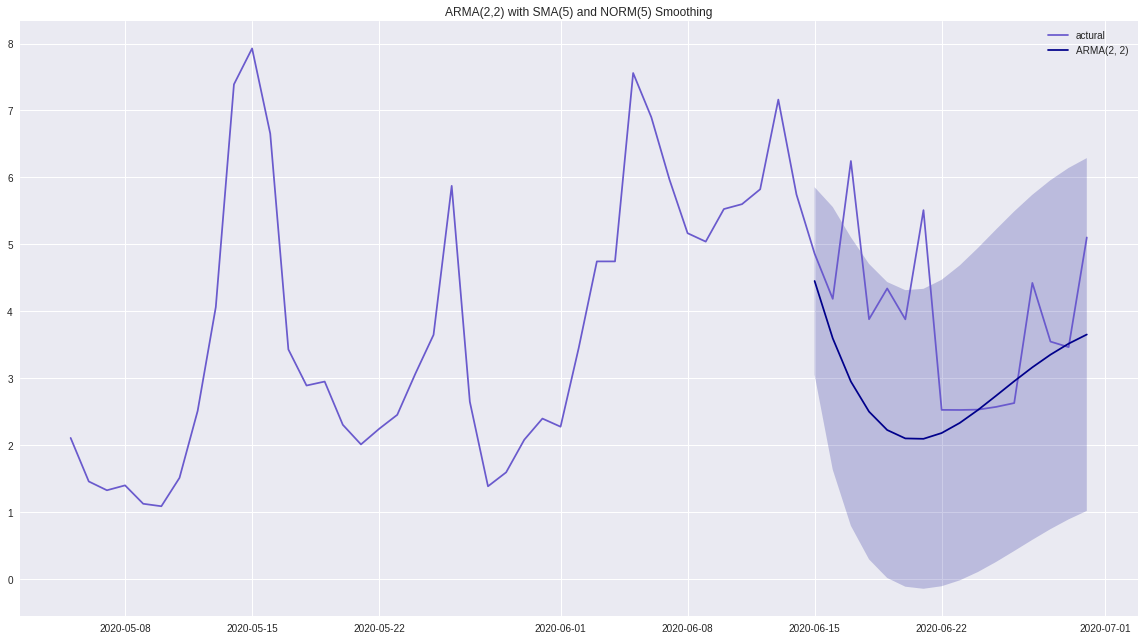

In [246]:
pred = model.forecast(16, alpha=0.2)
forecast = [pd.DataFrame(pred[0], columns=["prediction"]), pd.DataFrame(pred[2], columns=["ci_lower", "ci_upper"])]
forecast = pd.concat(forecast, axis=1).set_index(test.index)
fig, ax = plt.subplots(1, figsize=(16, 9))
ax = sns.lineplot(data=total_smooth, color="slateblue", label="actural")
ax.plot(forecast.prediction, c="darkblue", label="ARMA(2, 2)")
ax.fill_between(forecast.index, forecast.ci_lower, forecast.ci_upper, alpha=0.2, facecolor="darkblue")
ax.set(title="ARMA(2,2) with SMA(5) and NORM(5) Smoothing")
plt.legend()
plt.tight_layout()
plt.show()

### ETS Modelling

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



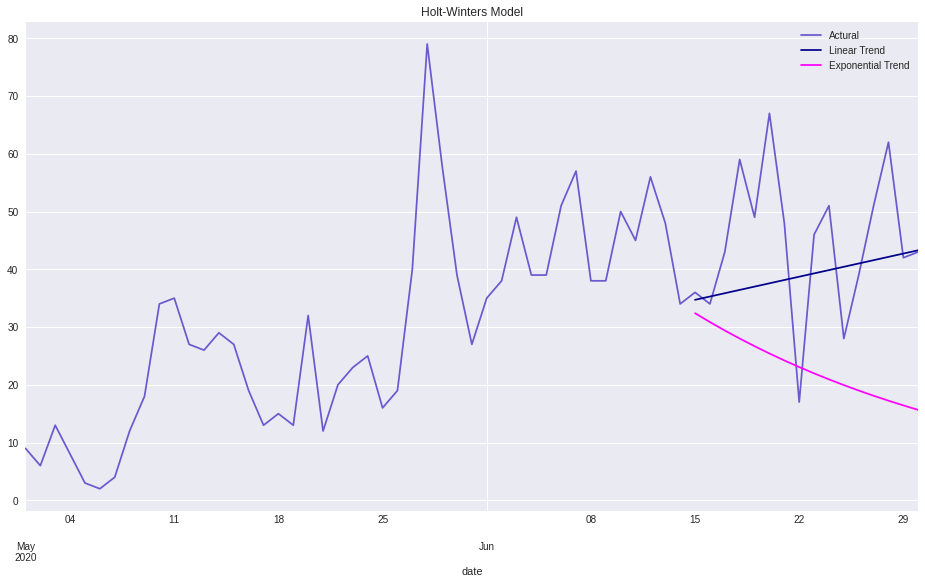

In [247]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
model1 = Holt(train).fit()
model2 = Holt(train, exponential=True).fit()
pred1 = model1.forecast(16)
pred2 = model2.forecast(16)
fig, ax = plt.subplots(1, figsize=(16, 9))
subdata["confirmed"].plot(color="slateblue", label="Actural", legend=True, title="Holt-Winters Model")
pred1.plot(color="darkblue", legend=True, label="Linear Trend")
pred2.plot(color="magenta", legend=True, label="Exponential Trend")
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



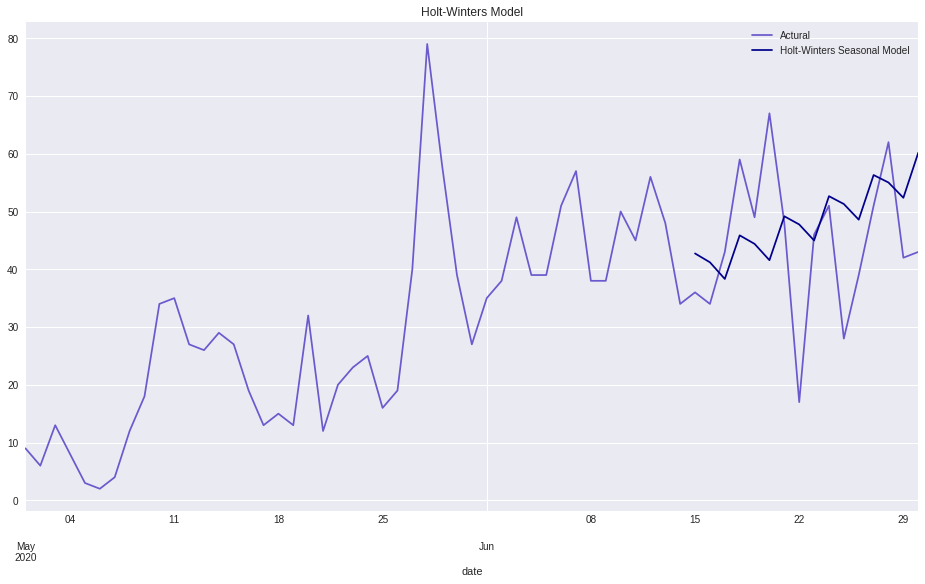

In [248]:
model3 = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=3).fit()
pred3 = model3.forecast(16)
fig, ax = plt.subplots(1, figsize=(16, 9))
subdata["confirmed"].plot(color="slateblue", label="Actural", legend=True, title="Holt-Winters Model")
pred3.plot(color="darkblue", legend=True, label="Holt-Winters Seasonal Model")
plt.show()

### Facebook Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


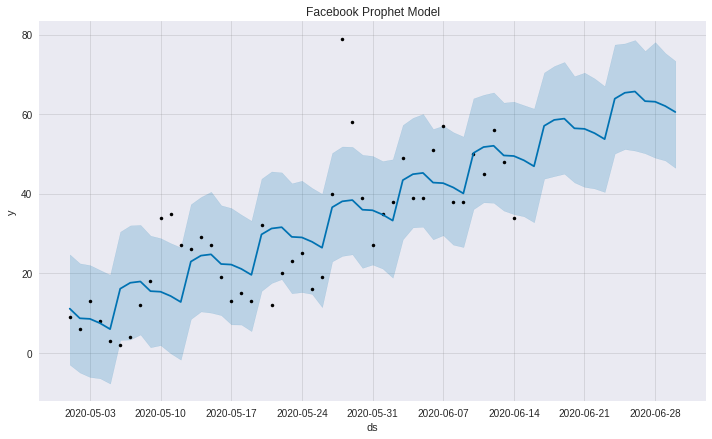

In [249]:
from fbprophet import Prophet
model = Prophet()
model.fit(train.reset_index(drop=False).rename(columns={"date": "ds", "confirmed": "y"}))
period_pred = model.make_future_dataframe(periods=16)
pred = model.predict(period_pred)
model.plot(pred)
plt.title("Facebook Prophet Model")
plt.show()

The model is not a good fit afterall.

In [288]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
n_steps = 4
X, y = split_sequence(train, n_steps)
for i in range(len(X)):
  print(X[i], y[i])

[ 9.  6. 13.  8.] 3.0
[ 6. 13.  8.  3.] 2.0
[13.  8.  3.  2.] 4.0
[8. 3. 2. 4.] 12.0
[ 3.  2.  4. 12.] 18.0
[ 2.  4. 12. 18.] 34.0
[ 4. 12. 18. 34.] 35.0
[12. 18. 34. 35.] 27.0
[18. 34. 35. 27.] 26.0
[34. 35. 27. 26.] 29.0
[35. 27. 26. 29.] 27.0
[27. 26. 29. 27.] 19.0
[26. 29. 27. 19.] 13.0
[29. 27. 19. 13.] 15.0
[27. 19. 13. 15.] 13.0
[19. 13. 15. 13.] 32.0
[13. 15. 13. 32.] 12.0
[15. 13. 32. 12.] 20.0
[13. 32. 12. 20.] 23.0
[32. 12. 20. 23.] 25.0
[12. 20. 23. 25.] 16.0
[20. 23. 25. 16.] 19.0
[23. 25. 16. 19.] 40.0
[25. 16. 19. 40.] 79.0
[16. 19. 40. 79.] 58.0
[19. 40. 79. 58.] 39.0
[40. 79. 58. 39.] 27.0
[79. 58. 39. 27.] 35.0
[58. 39. 27. 35.] 38.0
[39. 27. 35. 38.] 49.0
[27. 35. 38. 49.] 39.0
[35. 38. 49. 39.] 39.0
[38. 49. 39. 39.] 51.0
[49. 39. 39. 51.] 57.0
[39. 39. 51. 57.] 38.0
[39. 51. 57. 38.] 38.0
[51. 57. 38. 38.] 50.0
[57. 38. 38. 50.] 45.0
[38. 38. 50. 45.] 56.0
[38. 50. 45. 56.] 48.0
[50. 45. 56. 48.] 34.0


In [289]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [297]:
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [299]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 60.1401
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 59.9660
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 59.4797
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 57.9684
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 56.7845
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 56.0556
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 54.7446
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 53.3523
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 53.3843
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 50.9712
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 55.5753
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 49.2895
Epoch 13/100
2/2 [==============================]

In [300]:
X_pred, y_test = split_sequence(subdata["confirmed"][42:], n_steps)
X_pred = X_pred.reshape((X_pred.shape[0], X_pred.shape[1], n_features))
y_pred = model.predict(X_pred)
y_pred

array([[44.117653],
       [35.193146],
       [47.55849 ],
       [46.75646 ],
       [44.639732],
       [75.51787 ],
       [36.313965],
       [37.725666],
       [52.851456],
       [88.84992 ],
       [30.322517],
       [50.19472 ],
       [80.33883 ],
       [46.77592 ],
       [42.307724]], dtype=float32)

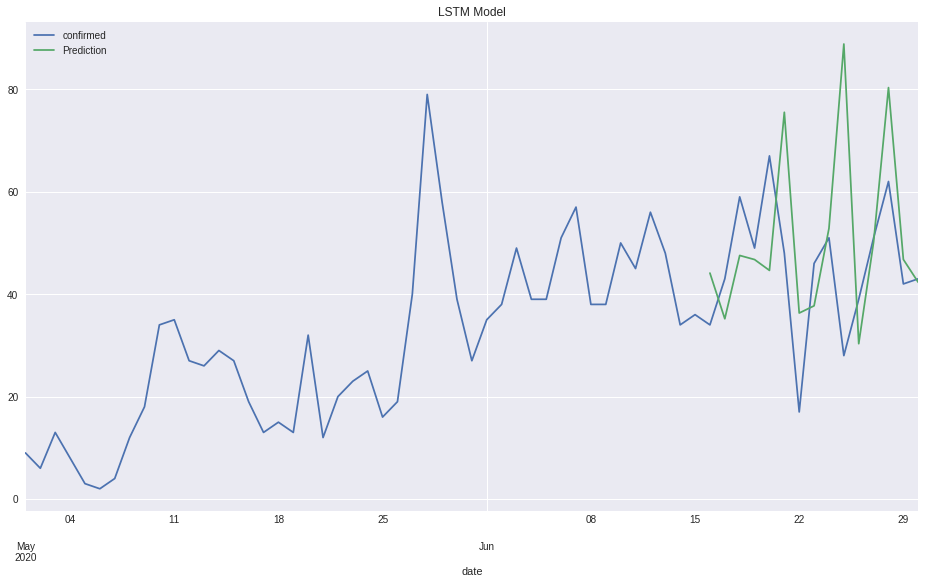

In [301]:
forecast = pd.DataFrame(y_pred.reshape(-1), index=test.index[1:], columns=["Prediction"])
pd.concat([subdata["confirmed"], forecast], axis=1).plot(figsize=(16, 9), title="LSTM Model")

While some moves have been predicted correctly, some have totally gone to the wrong direction. We do not have enough evidence to justify the forecast as a whole.

## Testing of Homogeneous Mortality Hypothesis

### Mortality Rates across Age Groups

In [302]:
timeage = pd.read_csv("./TimeAge.csv")
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [305]:
timeagegrouped = timeage.groupby("age")["confirmed", "deceased"].sum()
timeagegrouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,confirmed,deceased
age,,
0s,16107,0
10s,68752,0
20s,345827,0
30s,137539,194
40s,168250,295
50s,230030,1537
60s,158505,3743
70s,82107,7599
80s,54086,12136


Single-Factor ANOVA:
$H_0: p_{00}=p_{10}=p_{20}=...=p_{80}=p_I$   ;   $H_a$: *At least two being unequal*

$$F=\frac{SSTr/(I-1)}{SSE/\sum_i(n_i-1)}$$

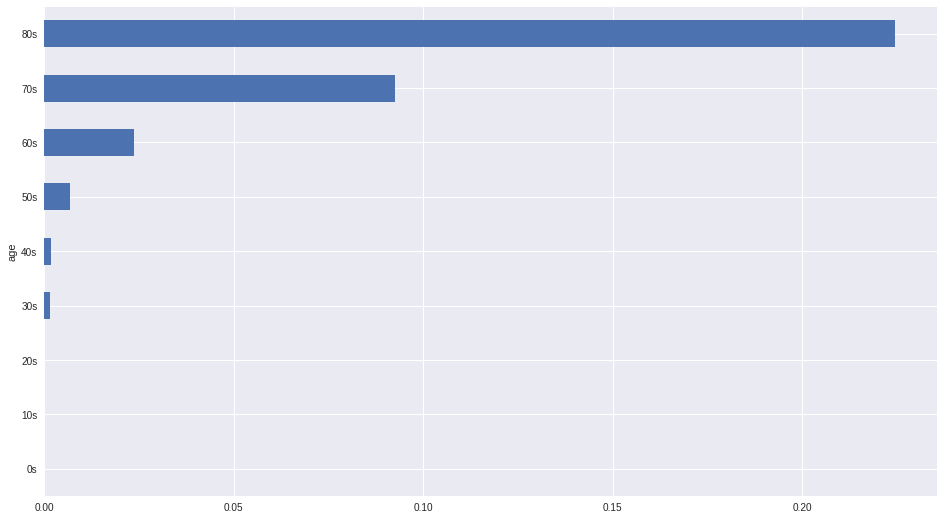

In [308]:
p = timeagegrouped["deceased"] / timeagegrouped["confirmed"]
p.plot(kind="barh", figsize=(16, 9))

In [312]:
p_I = p.mean()
SSTr = np.sum([(n*(x-p_I))**2 for x, n in zip(p, timeagegrouped["confirmed"])])
SSE = np.sum([x*(1-x)*n for x, n in zip(p, timeagegrouped["confirmed"])])
df = np.sum([n-1 for n in timeagegrouped["confirmed"]])
F = (SSTr/(len(p))) / (SSE/df) 
F

2776866034.6319556

The `F` ratio is huge, which implies that the treatment groups differentiate mortality rates significantly. More specifically, older age groups tend to have higher mortality rates, which is consistent with the observation from the horizontal bar chart. 

### Mortality Rates across Provinces

In [314]:
timeprovince = pd.read_csv("./TimeProvince.csv")
timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [315]:
timeprovincegrouped = timeprovince.groupby("province")["confirmed", "deceased"].sum()
timeprovincegrouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,confirmed,deceased
province,,
Busan,16341,299
Chungcheongbuk-do,5801,0
Chungcheongnam-do,16780,0
Daegu,807506,17624
Daejeon,5217,58
Gangwon-do,5908,225
Gwangju,3359,0
Gyeonggi-do,81059,1600
Gyeongsangbuk-do,161079,5393


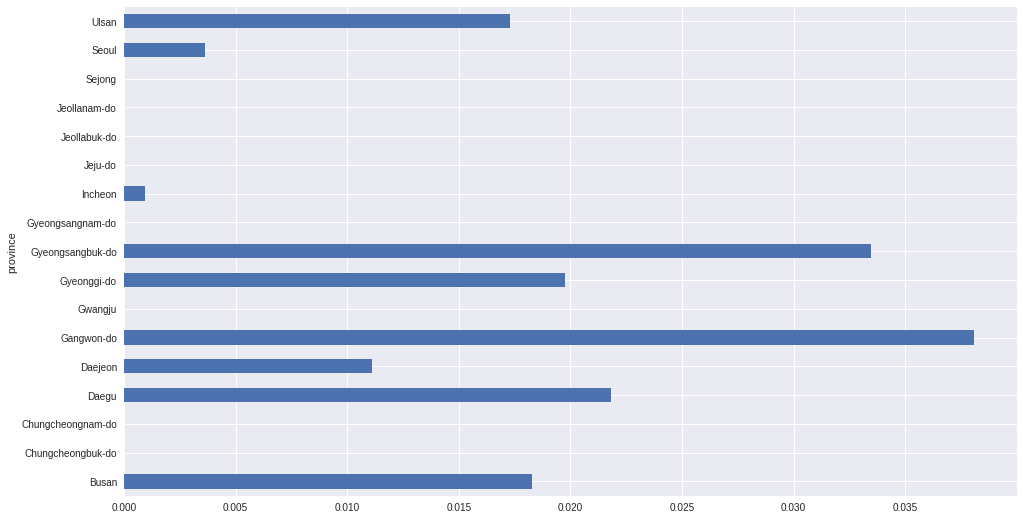

In [316]:
p = timeprovincegrouped["deceased"] / timeprovincegrouped["confirmed"]
p.plot(kind="barh", figsize=(16, 9))

In [320]:
p_I = p.mean()
SSTr = np.sum([(n*(x-p_I))**2 for x, n in zip(p, timeprovincegrouped["confirmed"])])
SSE = np.sum([x*(1-x)*n for x, n in zip(p, timeprovincegrouped["confirmed"])])
df = np.sum([n-1 for n in timeprovincegrouped["confirmed"]])
F = (SSTr/(len(p))) / (SSE/df) 
F

324758976.26049244

Once again, province treatment groups seem to explain mortality differentials well as `F` ratio is greater than 1 at any reasonable significance level.

### Mortality Rates across Gender Groups

In [321]:
timegender = pd.read_csv("./TimeGender.csv")
timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [322]:
timegendergrouped = timegender.groupby("sex")["confirmed", "deceased"].sum()
timegendergrouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,confirmed,deceased
sex,,
female,747467,12019
male,513727,13484


z Test: $H_0: p_m=p_f$; $H_0: p_m\neq p_f$

$$z=\frac{\hat{p}_m - \hat{p}_f}{\sqrt{\frac{\hat{p}_m(1-\hat{p}_m)}{n_m}+\frac{\hat{p}_f(1-\hat{p}_f)}{n_f}}}$$

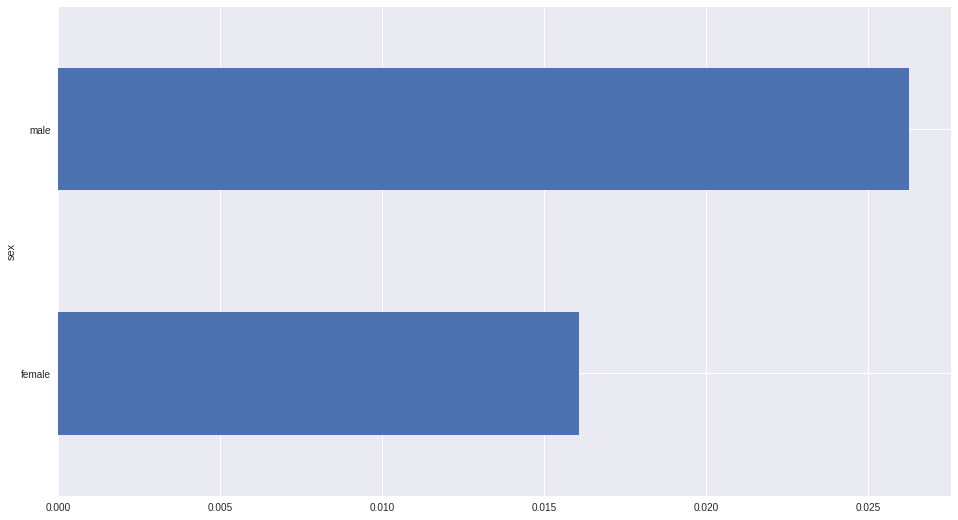

In [323]:
p = timegendergrouped["deceased"] / timegendergrouped["confirmed"]
p.plot(kind="barh", figsize=(16, 9))

In [326]:
z = (p["male"] - p["female"]) / np.sqrt(p["male"]*(1-p["male"])/timegendergrouped["confirmed"]["male"]+p["female"]*(1-p["female"])/timegendergrouped["confirmed"]["female"])
z

38.18116728523888

The staggering `z` score indicates that mortality rate also varies between genders. More specifically, males are far more vulnerable to COVID-led mortality than females. 